# Selene Reyes 

## MSBA 320 Project 8: Crime Rates in the U.S.

In [1010]:
# Importing libraries
import pandas as pd
import numpy as np
#import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
#from statsmodels.graphics.factorplots import interaction_plot
#import statsmodels.formula.api as smf
#from statsmodels.graphics.gofplots import ProbPlot

### Objective

The purpose of this report is to analyze the dataset of crime rates in mayor cities in the U.S., registered in three different years: 2000, 2005, and 2010. These cities were grouped in Metropolitan Statistical Area (MSA). Crimes were grouped in violent and property and were reported in incident by 100,000 population. Within the first group of violent crimes, we can find four types of crimes: murders and nonnegligent manslaughter, forcible rape, robbery, and aggravated assault. The second group of property crimes, includes: burglary, larceny-theft and motor vehicle theft.<br><br>
In this analysis, the variables that contribute the most to the rising crime rates were identified. The signifficance of the variation of crime rates over time were tested with ANOVA.

### Data loading

In [858]:
xls = pd.ExcelFile("dir-python/data/Crime_Major_Cities.xlsx")
crime00 = pd.read_excel(xls, 'Crime Rates 2000',skiprows=3)
crime05 = pd.read_excel(xls, 'Crime Rates 2005',skiprows=3)
crime10 = pd.read_excel(xls, 'Crime Rates 2010',skiprows=3)

In [408]:
crime00.head(3)

,Unnamed: 0,Metropolitan Statistical Area,All Violent,Murder,Rape,Robbery,Assault,Unnamed: 7,All,Burglary,Larceny,Car Theft,Unnamed: 12,Violent crime
0,NaN,"Abilene, TX M.S.A.",343.0,0.8,40.8,84.0,217.4,NaN,3692.7,819.4,2683.4,189.9,NaN,Murder and nonnegligent manslaughter
1,NaN,"Albany, GA M.S.A.",497.5,5.7,30.8,197.7,263.3,NaN,4993.4,1310.9,3398.9,283.6,NaN,Forcible rape
2,NaN,"Albany-Schenectady-Troy, NY M.S.A.",309.1,2.5,21.0,95.5,190.1,NaN,2882.1,601.4,2140.6,140.1,NaN,Robbery


In [409]:
crime05.head(3)

,Unnamed: 0,Metropolitan Statistical Area,All Violent,Murder,Rape,Robbery,Assault,Unnamed: 7,All Property,Burglary,Larceny,Car Theft,Unnamed: 12,Violent crime
0,NaN,"Abilene, TX M.S.A.",397.2,4.3,50.9,96.8,245.2,NaN,3845.5,1097.9,2529.7,217.8,NaN,Murder and nonnegligent manslaughter
1,NaN,"Akron, OH M.S.A.",266.4,5.4,47.3,116.6,97.1,NaN,3662.1,854.5,2504.2,303.4,NaN,Forcible rape
2,NaN,"Albany, GA M.S.A.",374.8,4.8,30.5,139.3,200.3,NaN,4057.2,1306.8,2502.3,248.1,NaN,Robbery


In [410]:
crime10.head(3)

,Unnamed: 0,Metropolitan Statistical Area,All Violent,Murder,Rape,Robbery,Assault,Unnamed: 7,All Property,Burglary,Larceny,Car Theft,Unnamed: 12,Definitions
0,NaN,"Abilene, TX M.S.A.",423.0,3.1,48.9,72.7,298.3,NaN,3617.3,1009.0,2459.8,148.5,NaN,Violent crime
1,NaN,"Akron, OH M.S.A.",304.7,3.7,40.9,105.1,155.0,NaN,3185.6,947.7,2074.5,163.3,NaN,Murder and nonnegligent manslaughter
2,NaN,"Albany, GA M.S.A.",566.0,8.7,24.9,150.4,382.1,NaN,4512.6,1417.8,2803.4,291.4,NaN,Forcible rape


In [411]:
crime00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 14 columns):
Unnamed: 0                       0 non-null float64
Metropolitan Statistical Area    262 non-null object
All Violent                      255 non-null float64
Murder                           250 non-null float64
Rape                             260 non-null float64
Robbery                          262 non-null float64
Assault                          257 non-null float64
Unnamed: 7                       0 non-null float64
All                              261 non-null float64
Burglary                         262 non-null float64
Larceny                          262 non-null float64
Car Theft                        261 non-null float64
Unnamed: 12                      0 non-null float64
Violent crime                    8 non-null object
dtypes: float64(12), object(2)
memory usage: 28.7+ KB


In [412]:
crime05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
Unnamed: 0                       0 non-null float64
Metropolitan Statistical Area    350 non-null object
All Violent                      350 non-null float64
Murder                           350 non-null float64
Rape                             350 non-null float64
Robbery                          350 non-null float64
Assault                          350 non-null float64
Unnamed: 7                       0 non-null float64
All Property                     350 non-null float64
Burglary                         350 non-null float64
Larceny                          350 non-null float64
Car Theft                        350 non-null float64
Unnamed: 12                      0 non-null float64
Violent crime                    8 non-null object
dtypes: float64(12), object(2)
memory usage: 38.4+ KB


In [413]:
crime10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
Unnamed: 0                       0 non-null float64
Metropolitan Statistical Area    365 non-null object
All Violent                      356 non-null float64
Murder                           365 non-null float64
Rape                             358 non-null float64
Robbery                          365 non-null float64
Assault                          363 non-null float64
Unnamed: 7                       0 non-null float64
All Property                     361 non-null float64
Burglary                         364 non-null float64
Larceny                          363 non-null float64
Car Theft                        364 non-null float64
Unnamed: 12                      0 non-null float64
Definitions                      9 non-null object
dtypes: float64(12), object(2)
memory usage: 40.0+ KB


### Data cleaning and data wrangling
Dropping columns that would not be used.

In [859]:
crime00.drop(["Unnamed: 0", "Unnamed: 7", "Unnamed: 12", "Violent crime"],axis=1, inplace = True)
crime00.rename(columns={'Metropolitan Statistical Area':'MSA','All':'Property', 'All Violent':'Violent'}, inplace=True) #changing names
crime05.drop(["Unnamed: 0", "Unnamed: 7", "Unnamed: 12", "Violent crime"],axis=1, inplace = True)
crime05.rename(columns={'Metropolitan Statistical Area':'MSA','All Property':'Property', 'All Violent':'Violent'}, inplace=True) #changing names
crime10.drop(["Unnamed: 0", "Unnamed: 7", "Unnamed: 12", "Definitions"],axis=1, inplace = True)
crime10.rename(columns={'Metropolitan Statistical Area':'MSA','All Property':'Property', 'All Violent':'Violent'}, inplace=True) #changing names

Adding column year in each dataset.

In [860]:
crime00["year"]=2000
crime05["year"]=2005
crime10["year"]=2010

Dropping missing values.

In [861]:
crime00 = crime00.dropna()
crime05 = crime05.dropna()
crime10 = crime10.dropna()

Concatenating the three years in one dataframe called "crime".

In [862]:
crimes = [crime00, crime05, crime10]
crime = pd.concat(crimes)
print(crime.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 364
Data columns (total 11 columns):
MSA          944 non-null object
Violent      944 non-null float64
Murder       944 non-null float64
Rape         944 non-null float64
Robbery      944 non-null float64
Assault      944 non-null float64
Property     944 non-null float64
Burglary     944 non-null float64
Larceny      944 non-null float64
Car Theft    944 non-null float64
year         944 non-null int64
dtypes: float64(9), int64(1), object(1)
memory usage: 88.5+ KB
None


In [863]:
crime['year'] = crime.year.astype(object)

In [1008]:
crime.describe()

,Violent,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,Car Theft
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,428.275847,4.427754,34.788665,104.510381,284.692055,3545.461017,789.984746,2476.911970,291.087076
std,208.931459,3.085229,16.688103,68.324366,157.494840,1148.500304,333.797828,783.399389,204.418238
min,0.000000,0.000000,1.800000,3.900000,0.000000,0.000000,170.600000,917.300000,0.000000
25%,269.275000,2.100000,23.700000,52.250000,167.800000,2621.900000,519.175000,1852.475000,148.350000
50%,398.350000,3.800000,31.850000,90.850000,257.550000,3499.100000,752.800000,2387.150000,229.300000
75%,548.300000,6.000000,42.700000,141.225000,369.500000,4288.450000,992.600000,2993.525000,380.450000
max,1443.600000,20.400000,193.200000,401.000000,1029.000000,8120.100000,2179.000000,6579.400000,1409.300000


### Exploratory Data Analysis (EDA)

In [1016]:
crime.groupby('year').describe().T
crime.groupby(['year']).agg([min, np.mean, np.std, max])

Violent                                 Murder                            \
         min        mean         std     max    min      mean       std   max   
year                                                                            
2000    94.5  468.154132  231.050132  1443.6    0.4  4.588017  3.239599  20.4   
2005     0.0  436.783143  218.524367  1286.4    0.0  4.672000  3.270168  19.6   
2010    63.7  392.400568  175.164641  1111.2    0.0  4.074716  2.744383  18.2   

     Rape              ...      Burglary         Larceny               \
      min       mean   ...           std     max     min         mean   
year                   ...                                              
2000  6.9  37.327686   ...    332.819550  2085.1  1014.2  2805.591736   
2005  3.5  35.899714   ...    332.535682  2034.0  1162.2  2553.412286   
2010  1.8  31.938352   ...    335.630921  2179.0   917.3  2174.878977   

                         Car Theft                                  
             std     max       min        mean         std     max  
year                                                                
2000  869.230400  6579.4      68.7  352.096694  204.239857  1064.1  
2005  775.875285  5533.6       0.0  338.622000  234.188411  1409.3  
2010  599.734490  3857.9      13.1  201.878125  127.638738   869.7  

[3 rows x 36 columns]

#### Crime rates (violent and property) by different years
It seems that crime rate has decline over the years. 

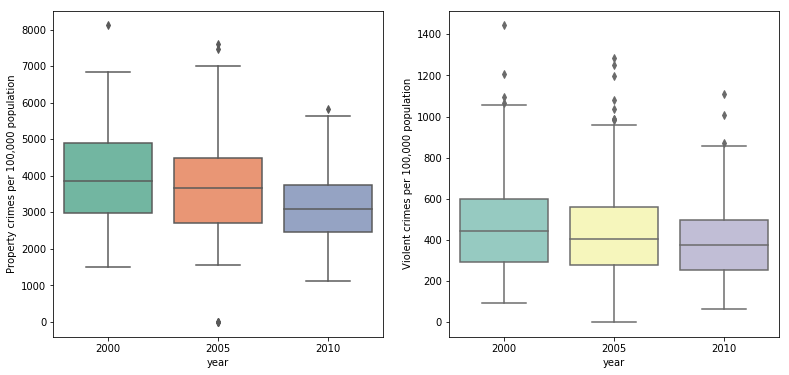

In [892]:
f, axes = plt.subplots(1, 2, figsize=(13, 6))
ax1= sns.boxplot(x="year", y='Property', data=crime, palette="Set2", ax=axes[0])
ax2= sns.boxplot(x="year", y='Violent', data=crime, palette="Set3", ax=axes[1])
ax1.set(ylabel='Property crimes per 100,000 population')
ax2.set(ylabel='Violent crimes per 100,000 population');

#### Variables contribution to the rising crime rates

Correlation matrix

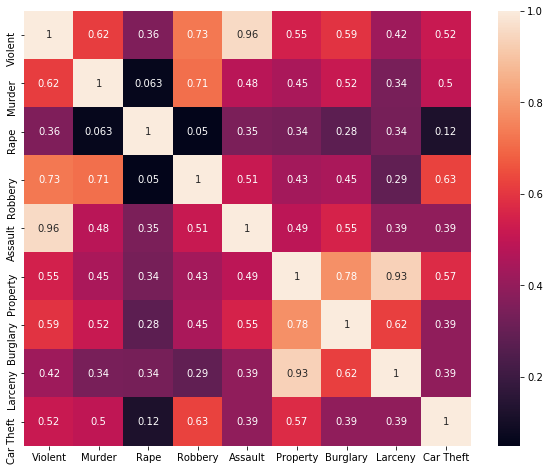

In [845]:
plt.figure(figsize=(10, 8))
corr = crime.corr()
sns.heatmap(corr, annot=True);

Assaults have a strong possitive relashiondhip with violent crime rates (Pearson correlation coefficient of 0.96), while Larceries have a strong possitive relashiondhip with property crimes (Pearson correlation coefficient of 0.93).
Let's have a closer look to these two variables.

In [878]:
summ = crime.groupby(['year']).describe()
summ[['Assault','Larceny']]

Assault                                                                  \
       count        mean         std   min      25%     50%      75%     max   
year                                                                           
2000   242.0  310.787603  172.395111  47.0  177.875  272.90  408.050  1029.0   
2005   350.0  290.002000  166.428393   0.0  164.725  257.65  369.275  1004.8   
2010   352.0  261.471591  132.873333   9.9  164.700  245.70  336.800   703.1   

     Larceny                                                                \
       count         mean         std     min       25%      50%       75%   
year                                                                         
2000   242.0  2805.591736  869.230400  1014.2  2114.225  2745.65  3372.825   
2005   350.0  2553.412286  775.875285  1162.2  1915.700  2504.95  3078.275   
2010   352.0  2174.878977  599.734490   917.3  1697.150  2134.65  2558.675   

              
         max  
year          
2000  6579.4  
2005  5533.6  
2010  3857.9

In [623]:
#plt.figure(figsize=(10, 7))

#sns.distplot(crime00["Assault"], hist=False, color="r", label="Assault 2000")
#sns.distplot(crime05["Assault"], hist=False, color="b", label="Assault 2005")
#sns.distplot(crime10["Assault"], hist=False, color="g", label="Assault 2010")

#sns.distplot(crime00["Larceny"], hist=False, color="pink", label="Larceny 2000")
#sns.distplot(crime05["Larceny"], hist=False, color="skyblue", label="Larceny 2005")
#sns.distplot(crime10["Larceny"], hist=False, color="olive", label="Larceny 2010", axlabel='Crime per 100,000');

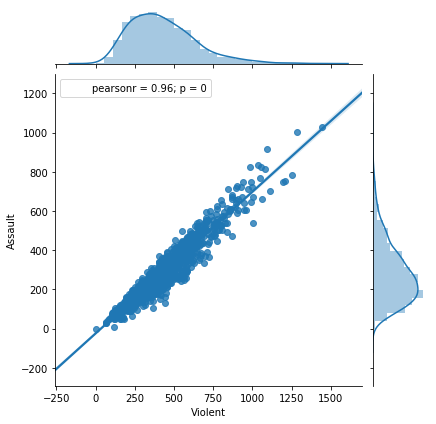

In [847]:
sns.jointplot("Violent", "Assault", data=crime, kind="reg");

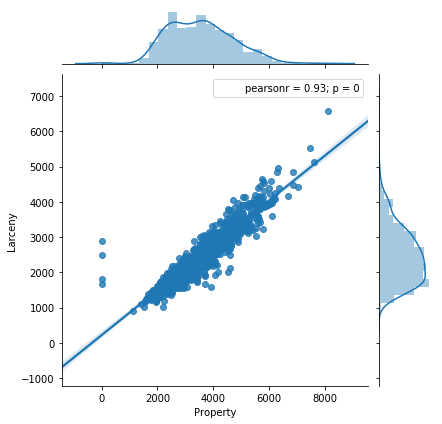

In [848]:
sns.jointplot("Property", "Larceny", data=crime, kind="reg");

In [1009]:
summ = crime.groupby(['year']).describe()
summ[['Violent','Property']].T

year                   2000         2005         2010
Violent  count   242.000000   350.000000   352.000000
         mean    468.154132   436.783143   392.400568
         std     231.050132   218.524367   175.164641
         min      94.500000     0.000000    63.700000
         25%     290.350000   278.950000   253.700000
         50%     440.950000   406.050000   373.750000
         75%     599.200000   558.225000   495.925000
         max    1443.600000  1286.400000  1111.200000
Property count   242.000000   350.000000   352.000000
         mean   3967.759091  3653.956286  3147.252273
         std    1210.945177  1196.702944   905.147230
         min    1502.200000     0.000000  1122.400000
         25%    2996.575000  2703.750000  2471.525000
         50%    3870.000000  3673.450000  3090.700000
         75%    4897.750000  4496.575000  3747.900000
         max    8120.100000  7601.900000  5824.600000

#### Crime rate by cities and years

Ordering cities by crime rate in descending order.

In [989]:
violent00 = crime00.sort_values('Violent').iloc[-10:,[0,2,3,4,5]]
property00= crime00.sort_values('Property').iloc[-10:,[0,7,8,9]]

In [990]:
violent05 = crime05.sort_values('Violent').iloc[-10:,[0,2,3,4,5]]
property05= crime05.sort_values('Property').iloc[-10:,[0,7,8,9]]

In [991]:
violent10 = crime10.sort_values('Violent').iloc[-10:,[0,2,3,4,5]]
property10= crime10.sort_values('Property').iloc[-10:,[0,7,8,9]]

##### Violent Crime rate by cities and years

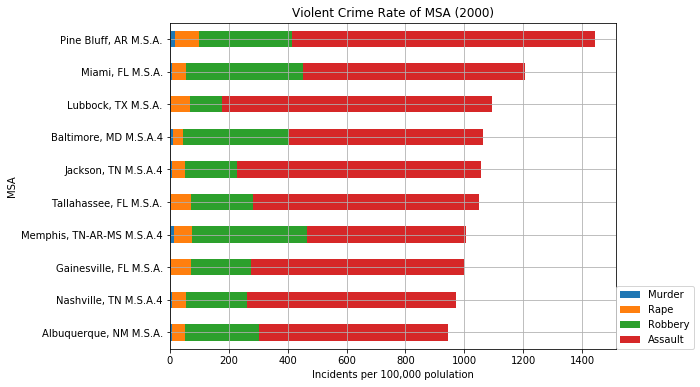

In [992]:
violent00.plot.barh(x='MSA', stacked=True,figsize=(8,6))
plt.legend(loc=(1,0))
plt.title('Violent Crime Rate of MSA (2000)')
plt.xlabel('Incidents per 100,000 polulation')
plt.grid(True);

In [963]:
# Selecting the 3 Metropolitan areas with highest violent crime rate in 2000
crime00.sort_values('Violent').iloc[-3:,0:6]

,MSA,Violent,Murder,Rape,Robbery,Assault
139,"Lubbock, TX M.S.A.",1093.6,5.5,64.3,106.6,917.2
149,"Miami, FL M.S.A.",1207.4,8.6,47.6,397.1,754.2
178,"Pine Bluff, AR M.S.A.",1443.6,16.5,81.5,316.6,1029.0


Pine Bluff, Miami and Lubbock are the metropolitan areas with highest violent crime rates in 2000.

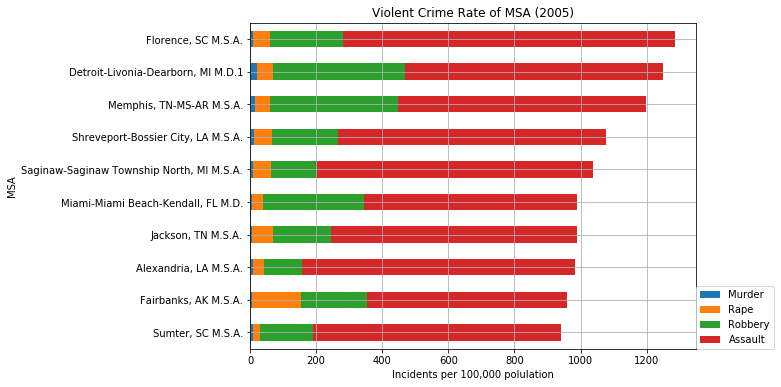

In [993]:
violent05.plot.barh(x='MSA', stacked=True,figsize=(8,6))
plt.legend(loc=(1,0))
plt.title('Violent Crime Rate of MSA (2005)')
plt.xlabel('Incidents per 100,000 polulation')
plt.grid(True);

In [964]:
# Selecting the 3 Metropolitan areas with highest violent crime rate in 2005
crime05.sort_values('Violent').iloc[-3:,0:6]

,MSA,Violent,Murder,Rape,Robbery,Assault
194,"Memphis, TN-MS-AR M.S.A.",1196.8,13.9,45.3,389.8,747.9
83,"Detroit-Livonia-Dearborn, MI M.D.1",1250.7,19.5,49.1,401.0,781.1
105,"Florence, SC M.S.A.",1286.4,8.0,51.0,222.6,1004.8


Florence, Detroit-Livonia-Dearborn and Memphis are the metropolitan areas with highest violent crime rates in 2005.

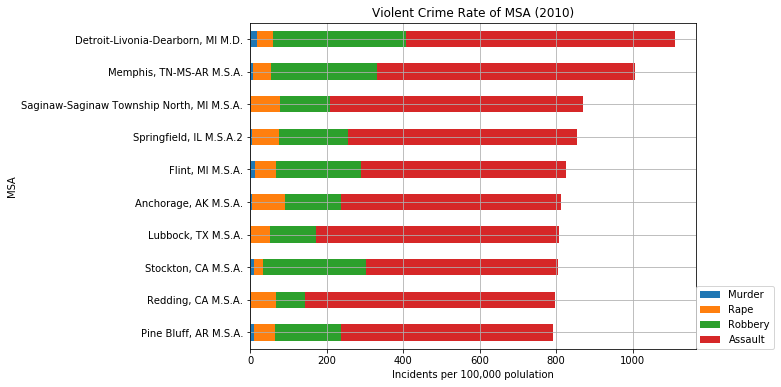

In [994]:
violent10.plot.barh(x='MSA', stacked=True,figsize=(8,6))
plt.legend(loc=(1,0))
plt.title('Violent Crime Rate of MSA (2010)')
plt.xlabel('Incidents per 100,000 polulation')
plt.grid(True);

In [965]:
# Selecting the 3 Metropolitan areas with highest violent crime rate in 2010
crime10.sort_values('Violent').iloc[-3:,0:6]

,MSA,Violent,Murder,Rape,Robbery,Assault
284,"Saginaw-Saginaw Township North, MI M.S.A.",870.7,3.5,76.0,129.2,661.9
204,"Memphis, TN-MS-AR M.S.A.",1006.5,8.6,46.1,278.1,673.6
91,"Detroit-Livonia-Dearborn, MI M.D.",1111.2,18.2,41.9,348.1,703.1


Detroit-Livonia-Dearborn, Memphis (again) and Saginaw-Saginaw Township North are the metropolitan areas with highest violent crime rates in 2010.

##### Property Crime rate by cities and years

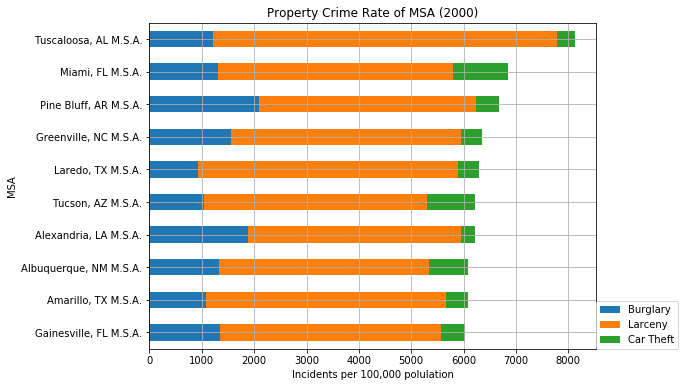

In [1015]:
property00.plot.barh(x='MSA', stacked=True,figsize=(8,6))
plt.legend(loc=(1,0))
plt.title('Property Crime Rate of MSA (2000)')
plt.xlabel('Incidents per 100,000 polulation')
plt.grid(True);

In [1012]:
# Selecting the 3 Metropolitan areas with highest property crime rate in 2000.
crime00.sort_values('Property').iloc[-3:,[0,6,7,8,9]]

,MSA,Property,Burglary,Larceny,Car Theft
178,"Pine Bluff, AR M.S.A.",6682.9,2085.1,4151.3,446.5
149,"Miami, FL M.S.A.",6855.8,1315.3,4476.4,1064.1
241,"Tuscaloosa, AL M.S.A.",8120.1,1208.2,6579.4,332.5


Tuscaloosa, Miami and Pine Bluff are the cities with highest properties crime rates in 2000.

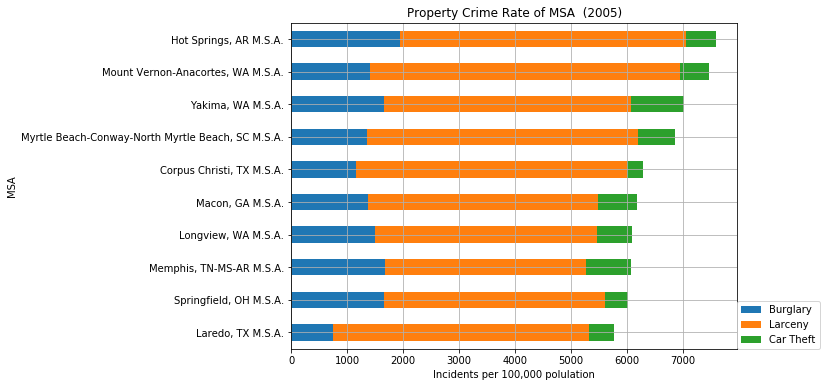

In [996]:
property05.plot.barh(x='MSA', stacked=True,figsize=(8,6))
plt.legend(loc=(1,0))
plt.title('Property Crime Rate of MSA  (2005)')
plt.xlabel('Incidents per 100,000 polulation')
plt.grid(True);

In [1005]:
# Selecting the 3 Metropolitan areas with highest property crime rate in 2005.
crime05.sort_values('Property').iloc[-3:,[0,6,7,8,9]]

,MSA,Property,Burglary,Larceny,Car Theft
346,"Yakima, WA M.S.A.",7017.4,1655.1,4417.0,945.3
211,"Mount Vernon-Anacortes, WA M.S.A.",7469.3,1414.3,5533.6,521.5
134,"Hot Springs, AR M.S.A.",7601.9,1939.2,5118.8,543.9


Hot Springs, Mount Vernon-Anacortes, and Yakima are the cities with highest properties crime rates in 2005.

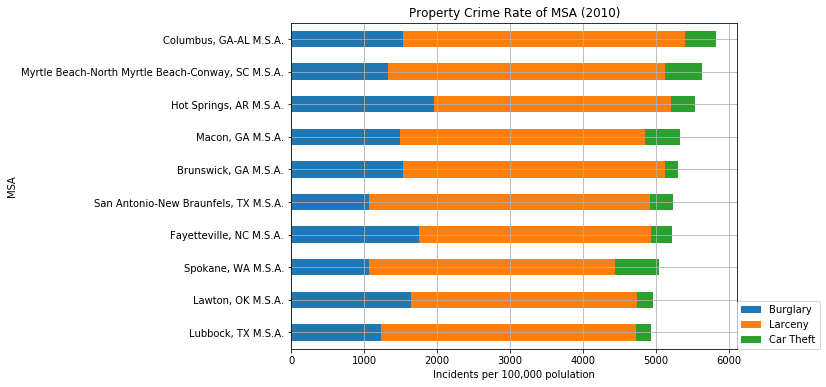

In [997]:
property10.plot.barh(x='MSA', stacked=True,figsize=(8,6))
plt.legend(loc=(1,0))
plt.title('Property Crime Rate of MSA (2010)')
plt.xlabel('Incidents per 100,000 polulation')
plt.grid(True);

In [1004]:
# Selecting the 3 Metropolitan areas with highest property crime rate in 2010.
crime10.sort_values('Property').iloc[-3:,[0,6,7,8,9]]

,MSA,Property,Burglary,Larceny,Car Theft
142,"Hot Springs, AR M.S.A.",5538.5,1962.6,3246.6,329.3
223,"Myrtle Beach-North Myrtle Beach-Conway, SC M.S.A.",5632.1,1330.8,3795.5,505.9
70,"Columbus, GA-AL M.S.A.",5824.6,1533.2,3857.9,433.5


Columbus, Myrtle Beach-North Myrtle Beach-Conway and Hot Springs are the cities with highest properties crime rates in 2005.

### Anova

#### Violent crime rate by year
We want to know whether violent crime rates over time are signifficantly different (significance level $\alpha$ = 0.05).<br><br>
Hypothesis in one-way ANOVA test:<br><br>
<center>*H0: The mean of violent crime rates are identical*</center>
<center>*H1 : At least the mean violent crime rates of one year is significantly different from the others*</center>

In [1013]:
# Mean rates at each year
means_crime = crime.groupby(['year']).mean()
means_crime[['Violent','Property']]

,Violent,Property
year,,
2000,468.154132,3967.759091
2005,436.783143,3653.956286
2010,392.400568,3147.252273


In [850]:
# Ordering the factor level
year = pd.Categorical(crime['year'],categories=[2000,2005,2010],ordered=True)
year

[2000, 2000, 2000, 2000, 2000, ..., 2010, 2010, 2010, 2010, 2010]
Length: 944
Categories (3, int64): [2000 < 2005 < 2010]

Violent crime rate by year

In [1014]:
violent_anova = ols('Violent ~ year', data= crime).fit()
aov_table = sm.stats.anova_lm(violent_anova, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
year,8.632147e+05,2.0,10.077739,0.000047
Residual,4.030096e+07,941.0,NaN,NaN


There was **significant** difference between means of crime rate in the three years analyzed (p < $\alpha$ = 0.05). In other words, we rejected the H0 and we concluded that there is at least one year where mean of crime rates is significantly different from the other years.<br><br>
Model checking

In [893]:
# fitted values (need a constant term for intercept)
model_fitted_y = violent_anova.fittedvalues

# model residuals
model_residuals = violent_anova.resid

# normalized residuals
model_norm_residuals = violent_anova.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

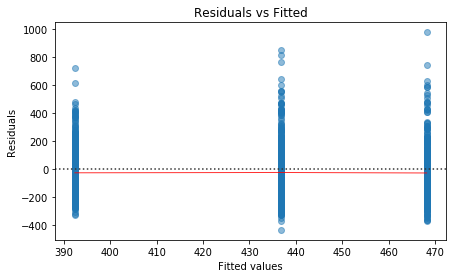

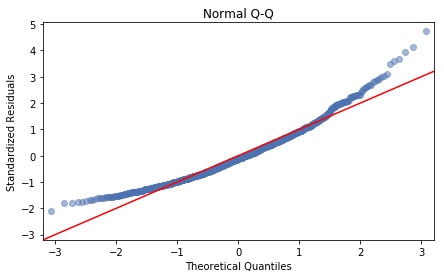

In [904]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(4)
plot_lm_1.set_figwidth(7)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Violent', data=crime, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

   
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=0.5); plt.xlim(-3.2, 3.2) 

plot_lm_2.set_figheight(4)
plot_lm_2.set_figwidth(7)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

In this residual versus fitted plot, the points appear randomly scattered on the plot. None of the years appear to have substantially different variability in crime rate and no outliers are apparent.<br><br>
The Q-Q plot shows that errors are not normally distributed (we can not see a straight line, i.e. 1-1 relationship between standardized residuals and theoretical residuals in both tails) relationship. 

#### Property crime rate by year
We want to know whether property crime rates over time are signifficantly different (significance level $\alpha$ = 0.05).<br><br>
Hypothesis in one-way ANOVA test:<br><br>
<center>*H0: The mean of property crime rates are identical*</center>
<center>*H1 : At least the mean property crime rates of one year is significantly different from the others*</center>

In [905]:
property_anova = ols('Property ~ year', data= crime).fit()
aov_table = sm.stats.anova_lm(property_anova, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
year,1.030939e+08,2.0,42.519996,2.094691e-18
Residual,1.140773e+09,941.0,NaN,NaN


There was **significant** difference between means of property crime rate in the three years analyzed (p < $\alpha$ = 0.05). In other words, we rejected the H0 and we concluded that there is at least one year where mean of property crime rates is significantly different from the other years.<br><br>
Model checking

In [906]:
# fitted values (need a constant term for intercept)
model_fitted_y = property_anova.fittedvalues

# model residuals
model_residuals = property_anova.resid

# normalized residuals
model_norm_residuals = property_anova.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

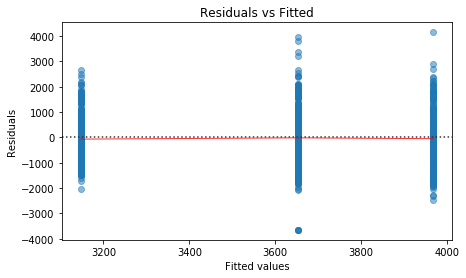

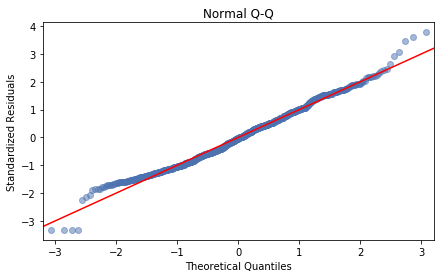

In [909]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(4)
plot_lm_1.set_figwidth(7)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Property', data=crime, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

   
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=0.5); plt.xlim(-3.2, 3.2) 

plot_lm_2.set_figheight(4)
plot_lm_2.set_figwidth(7)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

### Conclusion

The variables that contibute the most to the rising crime rates are **assault** and **larceny**.<br><br>
Assaults have a strong possitive relashiondhip with violent crime rates (Pearson correlation coefficient of 0.96), while Larceries have a strong possitive relashiondhip with property crimes (Pearson correlation coefficient of 0.93).<br><br>
There was **significant** difference between means of crime rate in the three years analyzed (p < $\alpha$ = 0.05).<br><br>
There was **significant** difference between means of property crime rate in the three years analyzed (p < $\alpha$ = 0.05)